In [3]:
import os
#import csv
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from gimpformats.gimpXcfDocument import GimpDocument
#from skimage.metrics import structural_similarity as ssim
#from sklearn.metrics import mean_squared_error as mse

#from PIL import Image
#from torch.utils.data import DataLoader
#import torch.nn.functional as func

from datasets import SkullUSDataset
#from models import SimpleUNet
#from copy import deepcopy
from utils import load_xcf


In [8]:
%matplotlib inline 

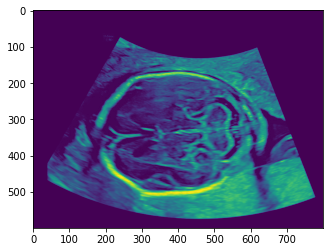

In [9]:
image, data, labels, points = load_xcf("data/1.xcf")

plt.imshow(image)
plt.show()

In [12]:
print(points)

[array([[273., 466.],
       [303., 476.]]), array([[342., 186.],
       [569., 324.],
       [192., 357.],
       [368., 498.]]), array([[428., 296.],
       [462., 331.],
       [356., 341.],
       [432., 371.]]), array([[507., 258.],
       [543., 295.],
       [468., 299.],
       [533., 327.],
       [470., 333.],
       [544., 358.],
       [475., 363.],
       [520., 397.]]), array([[297., 325.],
       [345., 327.],
       [302., 358.],
       [348., 358.]]), array([[357., 452.],
       [321., 466.],
       [390., 474.]]), array([[266., 291.],
       [273., 399.]]), array([[297., 344.],
       [249., 347.]])]


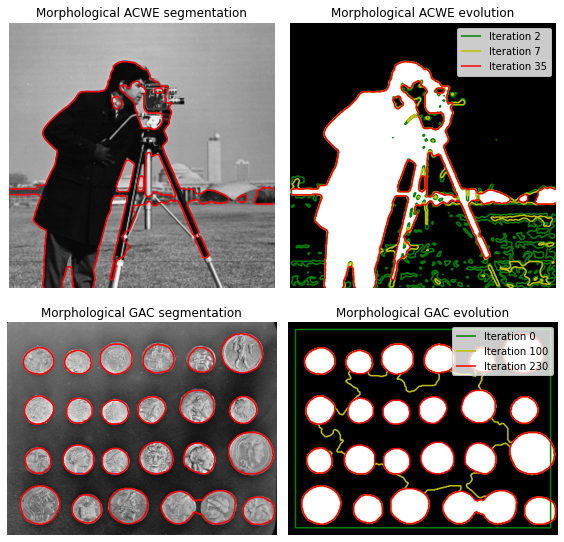

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import (morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set)


def store_evolution_in(lst):
    """Returns a callback function to store the evolution of the level sets in
    the given list.
    """

    def _store(x):
        lst.append(np.copy(x))

    return _store


# Morphological ACWE
image = img_as_float(data.camera())

# Initial level set
init_ls = checkerboard_level_set(image.shape, 6)
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_chan_vese(image, iterations=35, init_level_set=init_ls,
                             smoothing=3, iter_callback=callback)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].contour(ls, [0.5], colors='r')
ax[0].set_title("Morphological ACWE segmentation", fontsize=12)

ax[1].imshow(ls, cmap="gray")
ax[1].set_axis_off()
contour = ax[1].contour(evolution[2], [0.5], colors='g')
contour.collections[0].set_label("Iteration 2")
contour = ax[1].contour(evolution[7], [0.5], colors='y')
contour.collections[0].set_label("Iteration 7")
contour = ax[1].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 35")
ax[1].legend(loc="upper right")
title = "Morphological ACWE evolution"
ax[1].set_title(title, fontsize=12)


# Morphological GAC
image = img_as_float(data.coins())
gimage = inverse_gaussian_gradient(image)

# Initial level set
init_ls = np.zeros(image.shape, dtype=np.int8)
init_ls[10:-10, 10:-10] = 1
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_geodesic_active_contour(gimage, iterations=230,
                                           init_level_set=init_ls,
                                           smoothing=1, balloon=-1,
                                           threshold=0.69,
                                           iter_callback=callback)

ax[2].imshow(image, cmap="gray")
ax[2].set_axis_off()
ax[2].contour(ls, [0.5], colors='r')
ax[2].set_title("Morphological GAC segmentation", fontsize=12)

ax[3].imshow(ls, cmap="gray")
ax[3].set_axis_off()
contour = ax[3].contour(evolution[0], [0.5], colors='g')
contour.collections[0].set_label("Iteration 0")
contour = ax[3].contour(evolution[100], [0.5], colors='y')
contour.collections[0].set_label("Iteration 100")
contour = ax[3].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 230")
ax[3].legend(loc="upper right")
title = "Morphological GAC evolution"
ax[3].set_title(title, fontsize=12)

fig.tight_layout()
plt.show()